# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [2]:
import networkx as nx

from model import VRP, create_constraints, output_variables, create_example_1
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt
import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [3]:
# G = parse("Instances/E/E-n22-k4.vrp")
G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")
# G = parse("Instances/E/E-n101-k14.vrp")
# G = parse("Instances/Uchoa/X-n101-k25.vrp")
# G.graph['min_trucks'] = 26
# G = parse("Instances/Uchoa/X-n106-k14.vrp")
# G.graph['min_trucks'] = 14
# G = parse("Instances/Uchoa/X-n110-k13.vrp")
# G.graph['min_trucks'] = 13
# G = parse("Instances/Uchoa/X-n115-k10.vrp")
# G.graph['min_trucks'] = 10
# G = parse("Instances/Uchoa/X-n120-k6.vrp")
# G.graph['min_trucks'] = 6
# G = parse("Instances/Uchoa/X-n125-k30.vrp")
# G.graph['min_trucks'] = 30
# G = parse("Instances/Uchoa/X-n129-k18.vrp")
# G.graph['min_trucks'] = 18
# G = parse("Instances/Uchoa/X-n200-k36.vrp")
# G.graph['min_trucks'] = 36
# G = parse("Instances/Uchoa/X-n228-k23.vrp")
# G.graph['min_trucks'] = 23
# G = parse("Instances/Uchoa/X-n251-k28.vrp")
# G.graph['min_trucks'] = 28
# G = parse("Instances/Uchoa/X-n256-k16.vrp")
# G.graph['min_trucks'] = 16
# G = parse("Instances/Uchoa/X-n289-k60.vrp")
# G.graph['min_trucks'] = 61
# G = parse("Instances/Uchoa/X-n502-k39.vrp")
# G.graph['min_trucks'] = 39 #TODO: Ist dieses K auch das K, einer Optimallösung?

PARSE: Minimum number of trucks is 3


In [ ]:
model = VRP(G)

# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['methods'] = ["ng8"]
pricer.data['max_vars']= 10000
pricer.data['time_limit'] = 10

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G,heuristic_time=1)

model.optimize()
model.hideOutput(quiet=False)

HYGESE: Found Solution with value 569.0
PRICER_PY: The maximal path length is 69
PY PRICING: The neighborhood has been fixed to 8 neighbors.
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 25 variables (0 bin, 0 int, 0 impl, 25 cont) and 23 constraints
     23 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.1s|     1 |     0 |     8 |     - |    LP  |   0 |  25 |  23 |  23 |   0 |  0 |   0 |   0 |      --      | 5.690000e+02 |    Inf | unknown
  4.8s|     1 |     0 |    23 |     - |    32M |   0 |7578 |  23 |  23 |   0 |  0 |   0 |   0 |      --      | 5.690000e+02 |    Inf | unknown
PRICER_

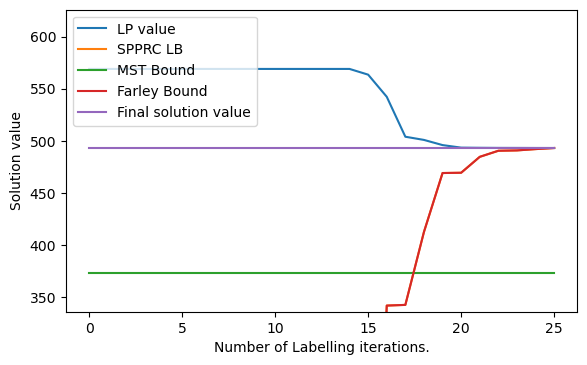

In [13]:
# This value is the exact pagewidth of latex
# plt.figure(figsize=(4.9823,4))
plt.figure(figsize=(6.6,4),dpi=100)

upper_bound = [x for x,y in pricer.data['bounds'][method]]
plt.plot(upper_bound, label="LP value")

xmax, max_lb = 0, 0
for method in pricer.data['methods']:
    lower_bounds = [y for x,y in pricer.data['bounds'][method]]
    plt.plot(lower_bounds, label=f'{method} LB')
    xmax = max(upper_bounds[0],xmax)
    if max(lower_bounds) > upper_bounds[-1]:
        print(f"The maximum lower bound for {method} is larger than the final bound")
    max_lb = max(max(lower_bounds),max_lb)

T = nx.minimum_spanning_tree(G)
mst = T.size(weight='weight') + min(G.edges().data('weight'),key=lambda edge: edge[2])[2]
mst = [mst for i in range(len(upper_bounds))]
plt.plot(mst, label="MST Bound")

# optimal = [69226 for i in range(len(upper_bounds))]
# plt.plot(optimal, label="BKS of the CVRP")

# spprc = [67560 for i in range(len(upper_bounds))]
# plt.plot(spprc, label="Optimal value of the SPPRC.")

# max_lb = [max_lb for i in range(len(upper_bounds))]
# plt.plot(max_lb, label="Maximal lower bound.")

farley_bounds = pricer.data['farley_bound']
plt.plot(farley_bounds, label="Farley Bound")

solval = model.getObjVal()
sol = [solval for i in range(len(upper_bounds))]
plt.plot(sol,label="Final solution value")

plt.ylim((mst[0]*0.9,xmax*1.1))

plt.legend(loc='upper left')
plt.xlabel("Number of Labelling iterations.")
plt.ylabel("Solution value")
# plt.savefig("plots/X-n502-k39.2cycle.pgf")
plt.show()

In [4]:
output_variables(model, pricer)

The solution contains the following paths: 
Only paths with associated value larger than 1e-06 are analysed.
1.0 * x218: (0, 1, 3, 0)
0.5 * x324: (0, 2, 7, 4, 0)
0.5 * x325: (0, 2, 8, 4, 0)
1.0 * x394: (0, 5, 6, 9, 0)
0.5 * x620: (0, 8, 7, 0)
Solution contains only elementary paths.
